# Yuvraj Shivtare- Assignment 3

## Part 2:
**Step 1:**

Reading Titanic.csv and spliting the data into training(random 70%) and test data(random 30%). It is observed that some features are categorical and others are numerical. Hence, preprocessing is necessary to use the given data.

Note: Make sure to have the Titanic.csv in the same location where this script is located.

In [1]:
import pandas as pd

data_frame = pd.read_csv("Titanic.csv")
data_frame['pclass'] = data_frame['pclass'].map({'1st':1,'2nd':2,'3rd':3})
data_frame['sex'] = data_frame['sex'].map({'male':0,'female':1})
data_frame=data_frame.drop(columns=['parch','ticket','fare','cabin','embarked','boat','body','home.dest','name','Unnamed: 0'])
data_frame['age'].fillna((data_frame['age'].mean()),inplace=True)
data_frame.head(10)

,pclass,survived,sex,age,sibsp
0,1,1,1,29.0000,0
1,1,1,0,0.9167,1
2,1,0,1,2.0000,1
3,1,0,0,30.0000,1
4,1,0,1,25.0000,1
5,1,1,0,48.0000,0
6,1,1,1,63.0000,1
7,1,0,0,39.0000,0
8,1,1,1,53.0000,2
9,1,0,0,71.0000,0


In [2]:
X = data_frame.drop(columns= ['survived'])
y = data_frame['survived']

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

**Step 2:** fit a decision tree model using independent variables ‘pclass + sex + age + sibsp’ and dependent variable ‘survived’.  Where ‘survived’ is a qualitative variable taking 1 (yes) or 0 (no) in your code. Plot the full tree.

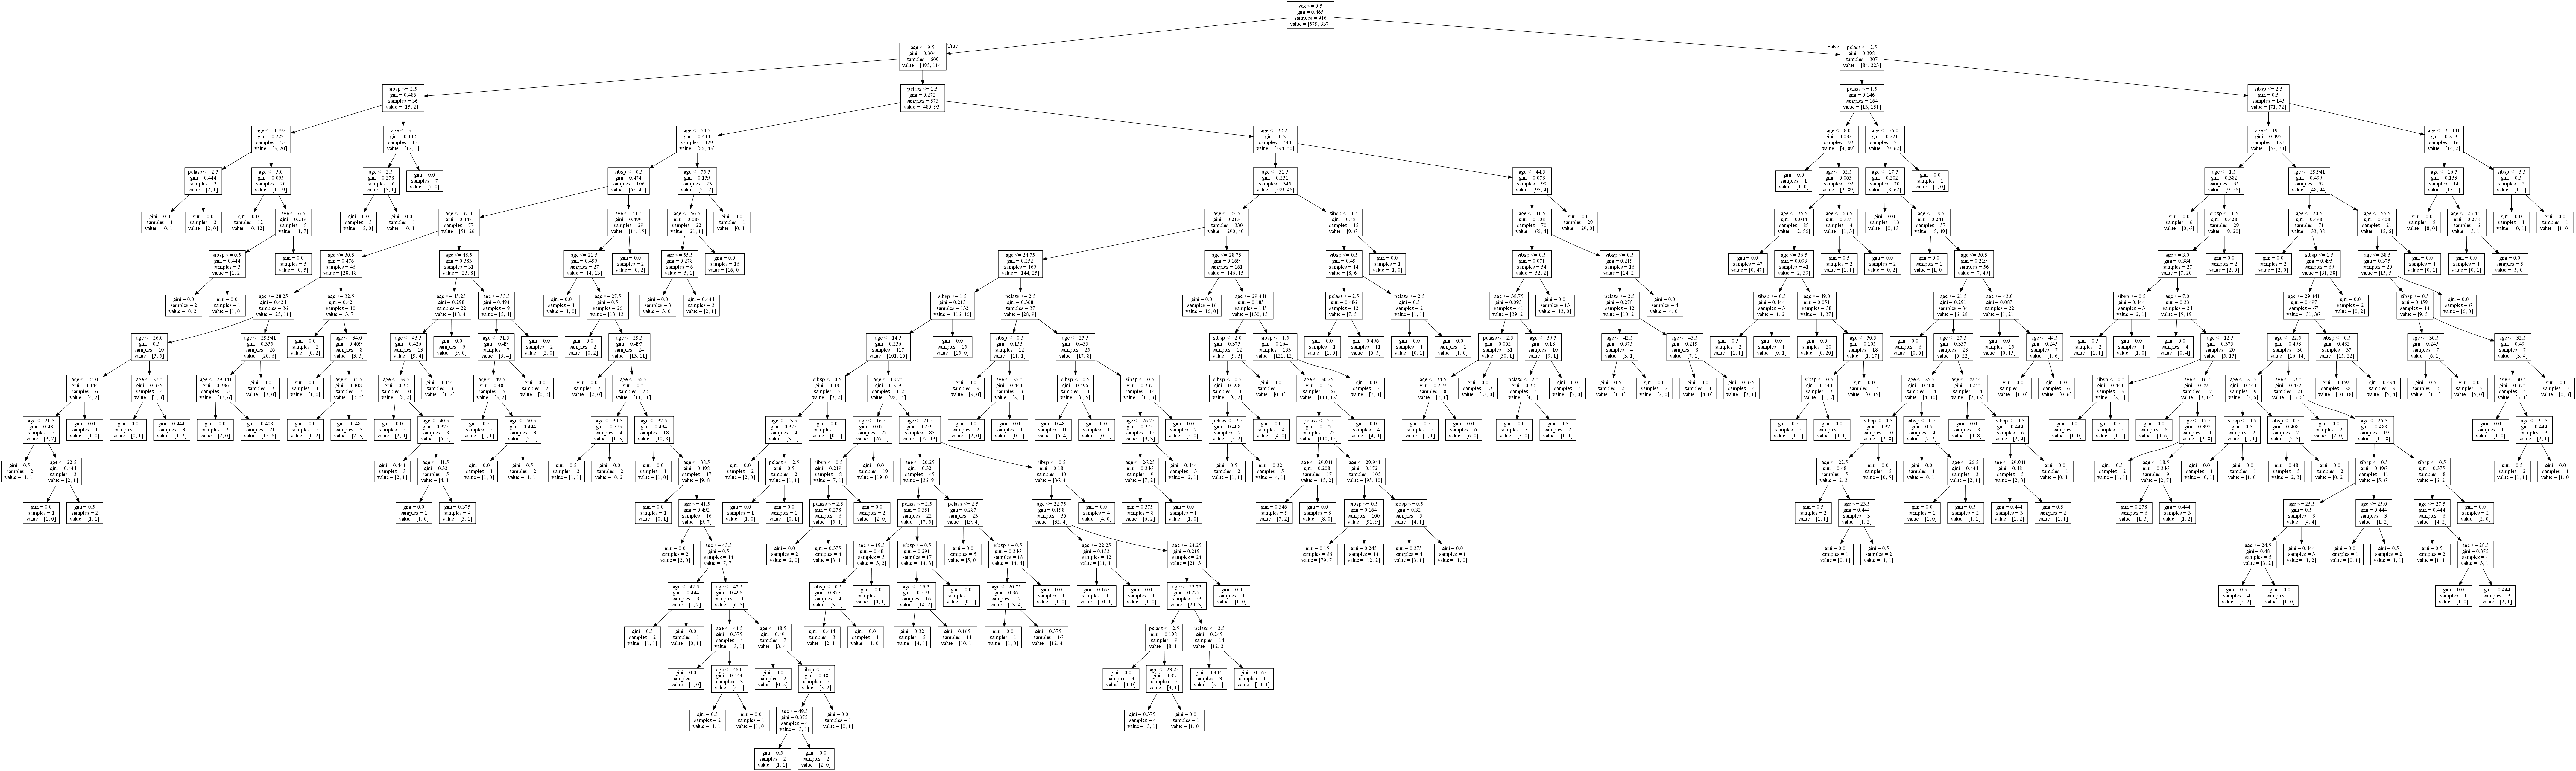

In [4]:
import graphviz 
from IPython.display import Image 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
import os 

os.environ['PATH'] += os.pathsep + r'C:\Program Files (x86)\Graphviz2.38\bin'
#os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train, y_train)
dot_data = tree.export_graphviz(classifier, out_file=None, feature_names = X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree.png')
Image(graph.create_png())

**From the above tree, we could clearly observe the overfitting.**

**Step 3:**

print out the performance measures of the full model: in‐sample and out-of‐
sample accuracy, defined as following: 


(1) in‐sample percent survivors correctly predicted (on training set) <br />
(2) in-sample percent fatalities correctly predicted (on training set) <br />
(3) out‐of‐sample percent survivors correctly predicted (on test set) <br />
(4) out-of‐sample percent fatalities correctly predicted (on test set) <br />

In [5]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_train)
print("Accuracy on train data: {0:.4f}".format(accuracy_score(y_train, y_pred)))
y_pred = classifier.predict(X_test)
print("Accuracy on train data: {0:.4f}".format(accuracy_score(y_test, y_pred)))

Accuracy on train data: 0.8908
Accuracy on train data: 0.7430


In [6]:
from sklearn.metrics import confusion_matrix

y_pred1 = classifier.predict(X_train)

cm = confusion_matrix(y_train, y_pred1)

TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

precision1 = TP/(TP+FN)
recall1 = TN/(FP+TN)

cm = confusion_matrix(y_test, y_pred)

TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

precision2 = TP/(TP+FN)
recall2 = TN/(FP+TN)

print("in‐sample percent survivors correctly predicted (on train set) : {0:.2f}%\n".format(precision1*100))
print("in‐sample percent fatalities correctly predicted (on train set) : {0:.2f}%\n".format(recall1*100))

print("out‐of‐sample percent survivors correctly predicted (on test set) : {0:.2f}%\n".format(precision2*100))
print("out-of‐sample percent fatalities correctly predicted (on test set) : {0:.2f}%\n".format(recall2*100))

in‐sample percent survivors correctly predicted (on train set) : 76.26%

in‐sample percent fatalities correctly predicted (on train set) : 96.55%

out‐of‐sample percent survivors correctly predicted (on test set) : 60.74%

out-of‐sample percent fatalities correctly predicted (on test set) : 83.91%



**Step 4:**

use cross‐validation to find the best parameter to prune the tree. You should be
able to plot a graph with the ‘tree size’ as the x-axis and ‘number of misclassification’ as
the Y-axis. Find the minimum number of misclassification and choose the corresponding
tree size to prune the tree.

In [7]:
import warnings
warnings.filterwarnings("ignore")

def get_results(output):
    best_parameters = output.best_params_
    print('Best parameters set found on training set: {}\n'.format(best_parameters))
    means = output.cv_results_['mean_test_score']
    stds = output.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, output.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    return best_parameters
        
        
from sklearn.model_selection import GridSearchCV

classifier = DecisionTreeClassifier()
parameters = {
    'criterion': ['gini','entropy'],
    'max_leaf_nodes': [2,3,4,5,6,7,8,9,10,11,12,13,14],
}

cv = GridSearchCV(classifier, parameters, cv=10)
cv.fit(X_train,y_train)

best_param = get_results(cv)


Best parameters set found on training set: {'criterion': 'gini', 'max_leaf_nodes': 7}

0.784 (+/-0.092) for {'criterion': 'gini', 'max_leaf_nodes': 2}
0.771 (+/-0.065) for {'criterion': 'gini', 'max_leaf_nodes': 3}
0.775 (+/-0.075) for {'criterion': 'gini', 'max_leaf_nodes': 4}
0.783 (+/-0.066) for {'criterion': 'gini', 'max_leaf_nodes': 5}
0.787 (+/-0.071) for {'criterion': 'gini', 'max_leaf_nodes': 6}
0.813 (+/-0.085) for {'criterion': 'gini', 'max_leaf_nodes': 7}
0.803 (+/-0.086) for {'criterion': 'gini', 'max_leaf_nodes': 8}
0.802 (+/-0.084) for {'criterion': 'gini', 'max_leaf_nodes': 9}
0.802 (+/-0.084) for {'criterion': 'gini', 'max_leaf_nodes': 10}
0.800 (+/-0.086) for {'criterion': 'gini', 'max_leaf_nodes': 11}
0.799 (+/-0.087) for {'criterion': 'gini', 'max_leaf_nodes': 12}
0.796 (+/-0.083) for {'criterion': 'gini', 'max_leaf_nodes': 13}
0.793 (+/-0.080) for {'criterion': 'gini', 'max_leaf_nodes': 14}
0.784 (+/-0.092) for {'criterion': 'entropy', 'max_leaf_nodes': 2}
0.771 (+/

In [8]:
max_depth=[1,2,3,4,5,6,7,8,9]
misclassified_values = []
import numpy as np

for depth in max_depth:
    
    classifier1 = DecisionTreeClassifier(max_depth=depth,max_leaf_nodes= best_param['max_leaf_nodes'],min_samples_split=9)
    classifier1 = classifier1.fit(X_train, y_train)
    y_pred = classifier1.predict(X_test)
    
    misclassified = np.where(y_test != y_pred)

    miss = []
    for item in misclassified:
        miss.extend(item)
        
    misclassified_values += [len(miss)]       

In [9]:
import matplotlib.pyplot as plt

plt.plot(max_depth,misclassified_values)
plt.xlabel('Tree Size')
plt.ylabel('Misclassifications')
plt.show()

<Figure size 640x480 with 1 Axes>

In [10]:
depth = misclassified_values.index(min(misclassified_values))+1
classifier = DecisionTreeClassifier(criterion= best_param['criterion'],max_depth=depth,max_leaf_nodes=best_param['max_leaf_nodes'])
classifier = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_train)
print("Accuracy on train data: {0:.4f}".format(accuracy_score(y_train, y_pred)))
y_pred = classifier.predict(X_test)
print("Accuracy on train data: {0:.4f}".format(accuracy_score(y_test, y_pred)))

Accuracy on train data: 0.8155
Accuracy on train data: 0.7888


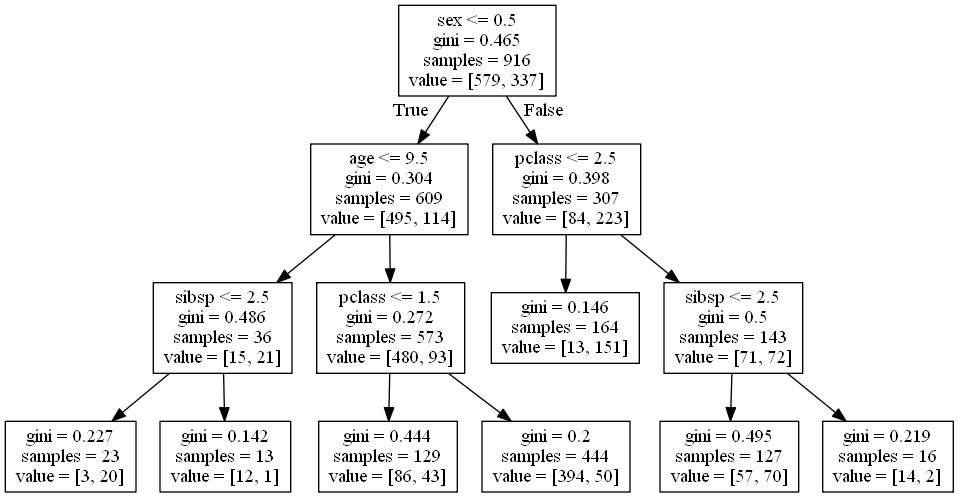

In [11]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

dot_data = tree.export_graphviz(classifier, out_file=None, feature_names = X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('prunetree.png')
Image(graph.create_png())

In [15]:
y_pred1 = classifier.predict(X_train)

CM = confusion_matrix(y_train, y_pred1)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

precision1 = TP/(TP+FN)
recall1 = TN/(FP+TN)

CM = confusion_matrix(y_test, y_pred)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

precision22 = TP/(TP+FN)
recall22 = TN/(FP+TN)

print("in‐sample percent survivors correctly predicted (on train set) : {0:.2f}%\n".format(precision1*100))
print("in‐sample percent fatalities correctly predicted (on train set) : {0:.2f}%\n".format(recall1*100))

print("out‐of‐sample percent survivors correctly predicted (on test set) : {0:.2f}%\n".format(precision22*100))
print("out-of‐sample percent fatalities correctly predicted (on test set) : {0:.2f}%\n".format(recall22*100))

in‐sample percent survivors correctly predicted (on train set) : 71.51%

in‐sample percent fatalities correctly predicted (on train set) : 87.39%

out‐of‐sample percent survivors correctly predicted (on test set) : 73.01%

out-of‐sample percent fatalities correctly predicted (on test set) : 83.04%



In [19]:
print("We can see that after pruning the tree, the accuracy of the testing data set \nfor out-of-sample survivors increased from {0:.2f}% to {0:.2f}% \n\nand the accuracy of the testing data \n\nfor out-of-sample fatalities correctly predicted increased from {0:.2f}% to {0:.2f}%.\n\nDue to the pruning of the tree, the accuracy of the testing set increased as well as the size of the tree is reduced. Due to which it becomes easier to understand the decision tree as well as getting more accurate output".format(precision2*100,precision22*100,recall22*100,recall22*100))

We can see that after pruning the tree, the accuracy of the testing data set 
for out-of-sample survivors increased from 60.74% to 60.74% 

and the accuracy of the testing data 

for out-of-sample fatalities correctly predicted increased from 60.74% to 60.74%.

Due to the pruning of the tree, the accuracy of the testing set increased as well as the size of the tree is reduced. Due to which it becomes easier to understand the decision tree as well as getting more accurate output


In [18]:
print("{} {} {} {}".format(precision2*100,precision22*100,recall22*100,recall22*100))

60.73619631901841 73.00613496932516 83.04347826086956 83.04347826086956
